In [1]:
# generic libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

# project specific custom libraries
from config import *
from simulation import simulate_decay_times, smear_decay_times
from analysis import *

from joblib import delayed, Parallel

In [2]:
#set a seed for numpys random number generator
np.random.seed(1998)

In [3]:
t_bounds = [0, 20000e-9]
n = 10000
n_sims = 1000

MUON_estimate = 2e-6
PION_estimate = 1.2e-8
initial_guess = [MUON_estimate, PION_estimate]

sigma_mult = 1/1
sigma = sigma_mult * PION_MEAN_LIFETIME

In [4]:
t_space = np.linspace(t_bounds[0], t_bounds[1], n)
t_computed_values = N(t_space, n)

# Part 1, simulate n decay times and create a histogram plot
simulated_decay_points = simulate_decay_times(n, t_bounds[1])

In [5]:
simulated_decay_points = smear_decay_times(simulated_decay_points, sigma=sigma)
print(simulated_decay_points[:, 0])

[4.83415219e-07 2.25072992e-07 5.14877861e-07 ... 3.28850440e-07
 2.66115387e-06 2.36688131e-06]


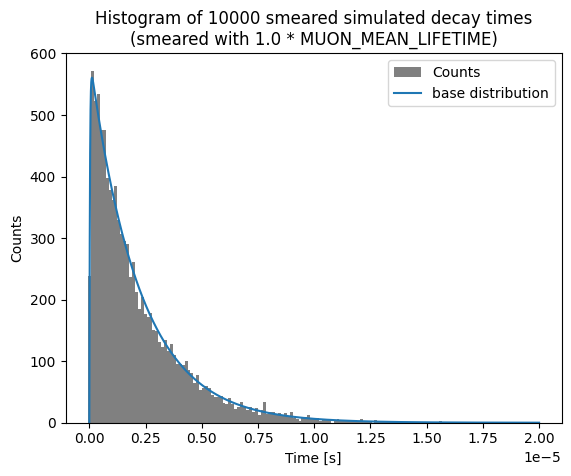

In [6]:
# create the histogram
counts, bins = np.histogram(simulated_decay_points[:, 0] , bins=150, density=False)
bin_width = bins[1]-bins[0]
plt.hist(bins[:-1], bins, weights=counts, color='gray', label='Counts')
plt.plot(t_space, t_computed_values*bin_width, label='base distribution')
plt.xlabel('Time [s]')
plt.ylabel('Counts')
plt.title(f'Histogram of {n} smeared simulated decay times\n(smeared with {sigma_mult} * MUON_MEAN_LIFETIME)')
plt.legend()
plt.savefig('../Documentation/images/smeared_decay_histogram_150bins.pdf')
plt.show()
plt.close()

In [7]:
bin_centers = 0.5 * (bins[:-1] + bins[1:])

MUON_estimate = 2e-6
PION_estimate = 2e-8

# PION_estimate = 2.6033e-8
# MUON_estimate = 2.1969811e-6

estimate_lifetime_count = estimate_lifetime_counts(bin_centers, bin_width, n, MUON_estimate, PION_estimate)

negative_log_likelihood(counts, estimate_lifetime_count)

np.float64(-53649.25337738585)

In [8]:
MUON_estimate_squares, PION_estimate_squares, MUON_uncer_squares, PION_uncer_squares = binned_least_squares_fit(counts, bins, initial_guess = [MUON_estimate, PION_estimate])

print(MUON_estimate_squares)
print(PION_estimate_squares)
print(MUON_uncer_squares)
print(PION_uncer_squares)

2.153113731471091e-06
2.84256971802515e-08
1.449601554865802e-08
1.2328532678549017e-09


In [9]:
estimate_lifetime_count_squares = estimate_lifetime_counts(bin_centers, bin_width, n, MUON_estimate_squares, PION_estimate_squares)
negative_log_likelihood(counts, estimate_lifetime_count_squares)

np.float64(-53664.89429208452)

In [10]:
negative_log_likelihood(counts, estimate_lifetime_count)

np.float64(-53649.25337738585)

In [11]:
MUON_estimate_like, PION_estimate_like = minimize(binned_maximum_likelihood, [2e-8, 2e-6], args=(counts, bin_centers, bin_width, n)).x
print(MUON_estimate_like)
print(PION_estimate_like)

-1015.6626284745106
195.14559554395282


/Users/tillboehringer/Dropbox/Studium/Physik/Semester4/PHY241_Project/PHY241/Code/analysis.py:218: RuntimeWarning: invalid value encountered in log
  nll = - np.sum(counts * np.log(estimated_counts))
/Users/tillboehringer/Dropbox/Studium/Physik/Semester4/PHY241_Project/PHY241/Code/analysis.py:218: RuntimeWarning: divide by zero encountered in log
  nll = - np.sum(counts * np.log(estimated_counts))
/Users/tillboehringer/Dropbox/Studium/Physik/Semester4/PHY241_Project/PHY241/Code/analysis.py:218: RuntimeWarning: invalid value encountered in multiply
  nll = - np.sum(counts * np.log(estimated_counts))
/Users/tillboehringer/Dropbox/Studium/Physik/Semester4/PHY241_Project/PHY241/Code/analysis.py:218: RuntimeWarning: invalid value encountered in log
  nll = - np.sum(counts * np.log(estimated_counts))
/Users/tillboehringer/Dropbox/Studium/Physik/Semester4/PHY241_Project/PHY241/Code/analysis.py:218: RuntimeWarning: invalid value encountered in log
  nll = - np.sum(counts * np.log(estimated_cou

In [12]:
MUON_estimate_full, PION_estimate_full, MUON_uncer_full, PION_uncer_full = binned_maximum_likelihood_fit_2(counts, bins, [MUON_estimate, PION_estimate])
print(MUON_estimate_full)
print(PION_estimate_full)

195.14559554395282
-1015.6626284745106


/Users/tillboehringer/Dropbox/Studium/Physik/Semester4/PHY241_Project/PHY241/Code/analysis.py:218: RuntimeWarning: divide by zero encountered in log
  nll = - np.sum(counts * np.log(estimated_counts))
/Users/tillboehringer/Dropbox/Studium/Physik/Semester4/PHY241_Project/PHY241/Code/analysis.py:218: RuntimeWarning: invalid value encountered in multiply
  nll = - np.sum(counts * np.log(estimated_counts))
/Users/tillboehringer/Dropbox/Studium/Physik/Semester4/PHY241_Project/PHY241/Code/analysis.py:218: RuntimeWarning: invalid value encountered in log
  nll = - np.sum(counts * np.log(estimated_counts))
/Users/tillboehringer/Dropbox/Studium/Physik/Semester4/PHY241_Project/PHY241/Code/analysis.py:218: RuntimeWarning: invalid value encountered in log
  nll = - np.sum(counts * np.log(estimated_counts))


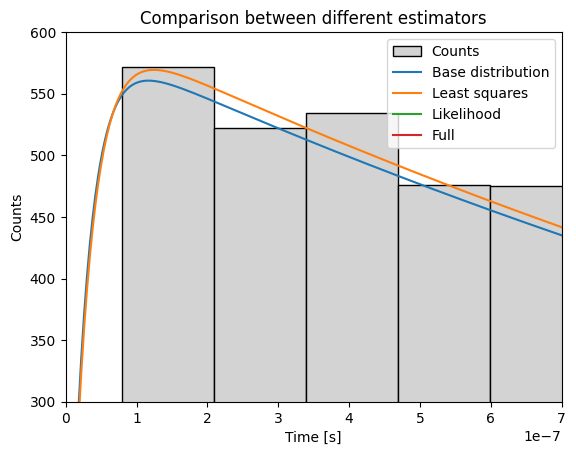

In [13]:
estimate_lifetime_count_squares = estimate_lifetime_counts(t_space, bin_width, n, MUON_estimate_squares, PION_estimate_squares)
estimate_lifetime_count_like = estimate_lifetime_counts(t_space, bin_width, n, MUON_estimate_like, PION_estimate_like)
estimate_lifetime_count_full = estimate_lifetime_counts(t_space, bin_width, n, MUON_estimate_full, PION_estimate_full)

plt.hist(bins[:-1], bins, weights=counts, color='lightgray', edgecolor='black', label='Counts')
plt.plot(t_space, t_computed_values*bin_width, label='Base distribution')
plt.plot(t_space, estimate_lifetime_count_squares, label='Least squares')
plt.plot(t_space, estimate_lifetime_count_like, label='Likelihood')
plt.plot(t_space, estimate_lifetime_count_full, label='Full')
plt.xlabel('Time [s]')
plt.ylabel('Counts')
plt.title(f'Comparison between different estimators')
plt.legend()
plt.xlim(0,0.7e-6)
plt.ylim(300, 600)
# plt.savefig('../Documentation/images/comparison_estimators_smeared.pdf')
plt.show()
plt.close()